In [25]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt


In [57]:
df = pd.read_csv('sat12.csv', sep=';')#, names=['tow', 'azim', 'elev', 'dist', 'x', 'y', 'z'], sep=';')
print(df.tail())
from math import atan, pi




        Unnamed: 0.1  Unnamed: 0  svId    gnssId       TOW  elev  azim  doMes  \
234491        234491     7502882  12.0  GNSS.GPS  280800.0   NaN   NaN    NaN   
234492        234492     7502914  12.0  GNSS.GPS  280801.0   NaN   NaN    NaN   
234493        234493     7502946  12.0  GNSS.GPS  280802.0   NaN   NaN    NaN   
234494        234494     7502978  12.0  GNSS.GPS  280803.0   NaN   NaN    NaN   
234495        234495     7503010  12.0  GNSS.GPS  280804.0   NaN   NaN    NaN   

        cpMes  prMes                                                alm  \
234491    NaN    NaN  (-19832359.698311385, -13640985.26525048, -114...   
234492    NaN    NaN  (-19841953.13430211, -13629242.802567028, -114...   
234493    NaN    NaN  (-19851539.572894208, -13617493.314071173, -11...   
234494    NaN    NaN  (-19861119.00873874, -13605736.803969871, -114...   
234495    NaN    NaN  (-19870691.436488934, -13593973.276475305, -11...   

                                                 alm_ecef     

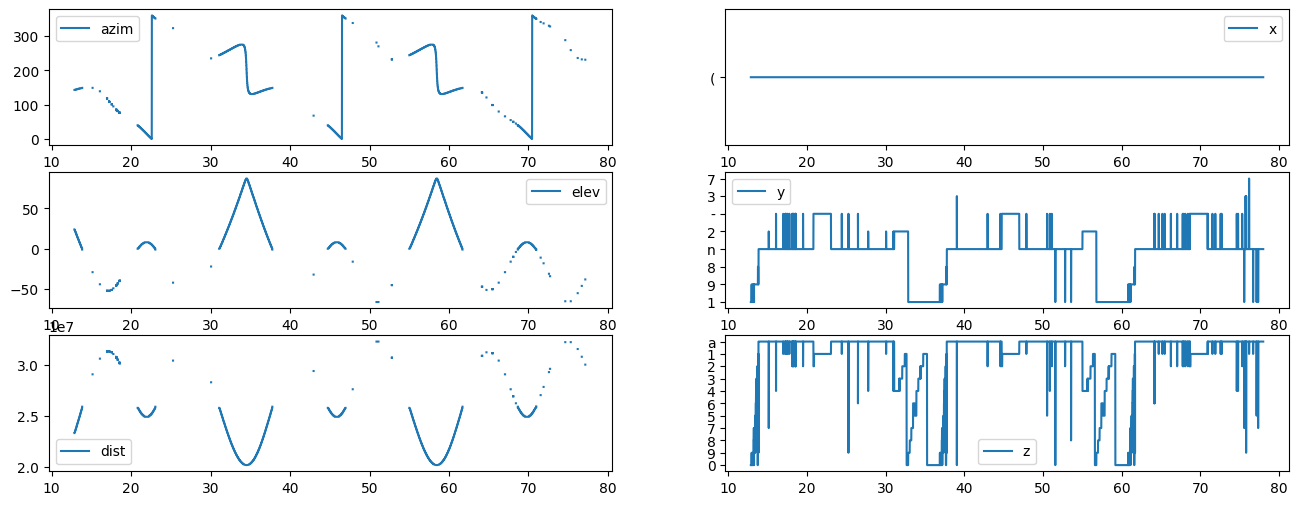

In [60]:
fig, axs = plt.subplots(3, 2, figsize=(16, 6))
axs[0, 0].plot(df.TOW/3600, df.azim, label='azim')#, s=0.3)
axs[0, 0].legend()
axs[1, 0].plot(df.TOW/3600, df.elev, label='elev')#, s=0.3)
axs[1, 0].legend()
axs[2, 0].plot(df.TOW/3600, df.dist, label='dist')#, s=0.3)
axs[2, 0].legend()
axs[0, 1].plot(df.TOW/3600, df.ubx_ecef.apply(lambda x: x[0]), label='x')#, s=0.3)
axs[0, 1].legend()
axs[1, 1].plot(df.TOW/3600, df.ubx_ecef.apply(lambda x: x[1]), label='y')#, s=0.3)
axs[1, 1].legend()
axs[2, 1].plot(df.TOW/3600, df.ubx_ecef.apply(lambda x: x[2]), label='z')#, s=0.3)
axs[2, 1].legend()
plt.savefig('sat12dasd.png')
plt.show()


0        52732.0;251.0;-59.0;115.14271280618112;-54.417...
1        52733.0;251.0;-59.0;115.14031168997879;-54.419...
2        52734.0;251.0;-59.0;115.13791055824278;-54.421...
3        52735.0;251.0;-59.0;115.13550941096425;-54.422...
4        62057.0;278.0;-7.0;14.46259524583304;-34.63771...
                               ...                        
94953    280800.0;69.0;12.0;355.95943219221977;-15.0187...
94954    280801.0;69.0;12.0;355.95591567082295;-15.0186...
94955    280802.0;69.0;12.0;355.9523991565252;-15.01846...
94956    280803.0;69.0;12.0;355.94888264933195;-15.0183...
94957    280804.0;69.0;12.0;355.9453661492499;-15.01815...
Name: tow, Length: 94958, dtype: object

In [47]:
df = pd.read_csv('PI.txt', names=['t', 'input', 'output', 'U', 'rpm', 'derivation'], sep=';', header=None)
# print(df)
# plt.plot(df.t, df.er, label='error')
print(df.input.iloc[0], df.input.iloc[-1])
# df.output -= df.input.iloc[0]
# df.input -= df.input.iloc[0]
# df.output /= df.input.iloc[-1]
# df.input /= df.input.iloc[-1]
df.input /= 1000
df.output /= 1000
df.U /= 2000
print(df)

nan 1000.0
           t  input  output       U       rpm    derivation
0       INIT    NaN     NaN     NaN       NaN           NaN
1   0.004152    1.0   0.002  0.9980  0.000000  5.449829e+07
2   0.055174    1.0   0.003  1.0000  0.000000 -1.959951e+01
3   0.101010    1.0   0.002  1.0000  1.333333  2.181718e+01
4   0.145804    1.0   0.003  1.0000  1.083333 -2.232439e+01
..       ...    ...     ...     ...       ...           ...
94  4.244967    1.0   0.960  0.0815  0.000000  0.000000e+00
95  4.288719    1.0   0.958  0.0850  0.000000  4.571213e+01
96  4.333513    1.0   0.960  0.0850  0.000000 -4.464877e+01
97  4.379349    1.0   0.958  0.0890  0.000000  4.363406e+01
98  4.424143    1.0   0.960  0.0885  0.000000 -4.464902e+01

[99 rows x 6 columns]


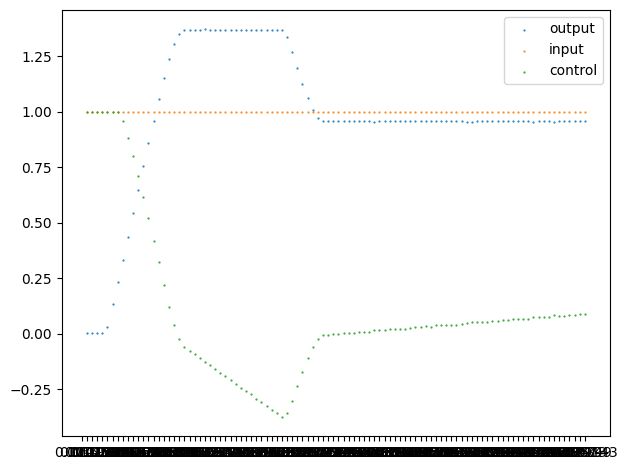

In [48]:

# print(df.in_.iloc[-1])
plt.scatter( df.t, df.output, label='output', s=0.3)
plt.scatter(df.t, df.input, label='input', s=0.3)
plt.scatter(df.t, df.U, label='control', s=0.3)
# plt.plot(df.t, df.speed, label='speed')
D = 0.05
# plt.plot(df.t, [1-D] * len(df.t), linestyle='--', color='gray')
# plt.plot(df.t, [1+D] * len(df.t),  linestyle='--', color='gray')
plt.tight_layout()
plt.legend()
plt.savefig('PI.png')
plt.show()

In [49]:
plt.plot(df.t, df.er, label='error')
plt.plot(df.t, df.out, label='out')
plt.legend()
plt.show()

AttributeError: 'DataFrame' object has no attribute 'er'

In [46]:
df = pd.read_csv('sat12.csv', sep=';')
df.head()

,Unnamed: 0,TOW,az,el,az_cor,el_cor
0,0,46308.999,143.0,24.0,315.253911,-29.621162
1,1,46309.999,143.0,24.0,315.249931,-29.619684
2,2,46311.000,143.0,24.0,315.245946,-29.618204
3,3,46312.000,143.0,24.0,315.241966,-29.616725
4,4,46313.000,143.0,24.0,315.237986,-29.615247


C:\Users\kippe\AppData\Local\Temp\ipykernel_49140\2947557027.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.htime = df.TOW / 3600


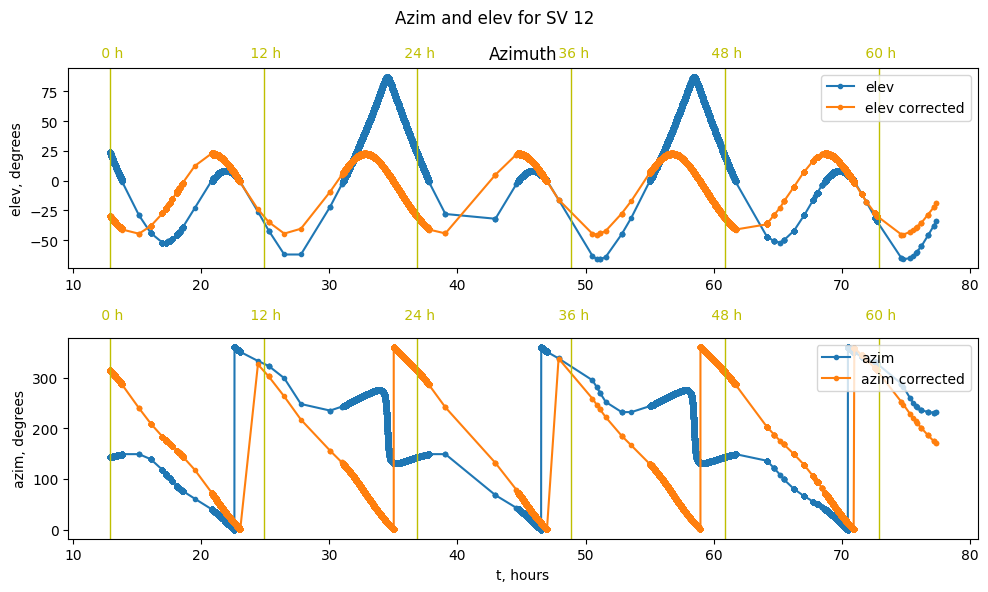

In [47]:
df.htime = df.TOW / 3600
fig, axs = plt.subplots(2, figsize=(10, 6))
fig.suptitle('Azim and elev for SV 12')

axs[0].plot(df.htime, df.el, label='elev', marker='.')
axs[1].plot(df.htime, df.az, label='azim', marker='.')
axs[0].plot(df.htime, df.el_cor, label='elev corrected', marker='.')
axs[1].plot(df.htime, df.az_cor, label='azim corrected', marker='.')

for i in range(2):
    ymax = axs[i].get_ylim()[1]
    for t in np.arange(min(df.htime), max(df.htime), 12.0):
        axs[i].axvline(x=t, color='y', linewidth=1)
        # axs[i].annotate(f'{round(t - min(htime)): 2} ч', (t, ymax*0.95), color='y')
        axs[i].text(t, ymax * 1.1, f'{round(t - min(df.htime)): 2} h', color='y', ha='center')
axs[0].legend(loc='upper right')
axs[1].legend(loc='upper right')
axs[0].set_title('Elevation')
axs[0].set_title('Azimuth')
axs[1].set_xlabel('t, hours')
axs[0].set_ylabel('elev, degrees')
axs[1].set_ylabel('azim, degrees')
plt.tight_layout()
plt.savefig('sat12.png', dpi=500)
plt.show()


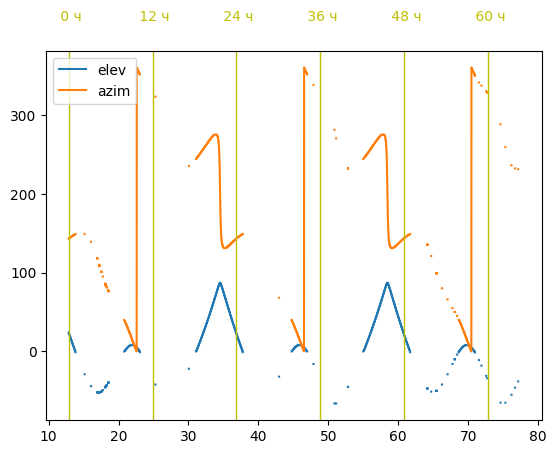

In [9]:
df.htime = df.TOW / 3600
plt.plot(df.htime, df.elev, label='elev')
plt.plot(df.htime, df.azim, label='azim')
ymax = plt.ylim()[1]
for t in np.arange(min(df.htime), max(df.htime), 12.0):
    plt.axvline(x=t, color='y', linewidth=1)
    # axs[i].annotate(f'{round(t - min(htime)): 2} ч', (t, ymax*0.95), color='y')
    plt.text(t, ymax * 1.1, f'{round(t - min(df.htime)): 2} ч', color='y', ha='center')
plt.legend()
plt.savefig('sv12.png')
plt.show()


(0.0, 1.0)

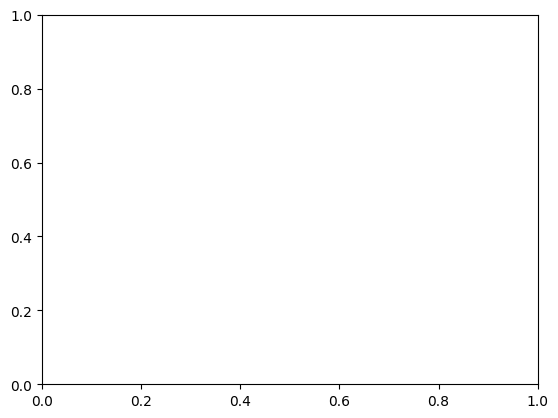

In [7]:
plt.ylim()

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from datetime import datetime, timedelta
import pymap3d as pm
import os
from math import sin, cos

C:\Users\kippe\AppData\Local\Temp\ipykernel_49140\1714338477.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
def R(phi, lam):
    phi = np.radians(phi)
    lam = np.radians(lam)
    return np.array([
        [-sin(phi)*cos(lam), -sin(phi)*sin(lam), 0],
        [-sin(lam), cos(lam), 0],
        [-cos(phi) * cos(lam), -cos(phi) * sin(lam), -sin(phi)],
    ])
lla = (55.690555555555555, 37.858333333333334, 140)
aer = (45, 70, 20000000)

In [19]:
r = R(lla[0], lla[1])
azim = aer[0]
elev = aer[1]
dist = aer[2]
from math import radians, degrees, pi, asin, sin, cos, atan2

def R(phi, lam):
    phi = np.radians(phi)
    lam = np.radians(lam)
    return np.array([
        [-sin(phi) * cos(lam), -sin(phi) * sin(lam), 0],
        [-sin(lam), cos(lam), 0],
        [-cos(phi) * cos(lam), -cos(phi) * sin(lam), -sin(phi)],
    ])

az = radians(azim)
el = radians(elev)
E, N, U = [sin(az) * cos(el) * dist, cos(az) * cos(el) * dist, sin(el) * dist]
NED = np.array([N, E, -U])
print(f'ENU: {[E, N, U]}')
UVW = np.transpose(R(lla[0], lla[1])) @ NED
print(f'UVW: {UVW}')
XYZ = pm.geodetic2ecef(lla[0],
                       lla[1],# - TOW * OmegaEathDot * 180 / np.pi * 0.1,
                       lla[2])
print(f'XYZ: {XYZ}')
print(XYZ + UVW)

ENU: [4836895.252959507, 4836895.252959507, 18793852.415718168]
UVW: [ 2240931.51775254  7868194.14842603 15523823.46051847]
XYZ: (2845020.0204312843, 2211466.732658049, 5245214.832847871)
[ 5085951.53818382 10079660.88108408 20769038.29336634]


In [22]:
print(pm.aer2ecef(azim, elev, dist, lla[0], lla[1], lla[2]))
XYZ = pm.geodetic2ecef(*lla)
print(f'XYZ: {XYZ}')
enu = pm.aer2enu(azim, elev, dist)
print(f'ENU: {enu}')
uvw = pm.enu2uvw(*enu, lla[0], lla[1])
print(f'UVW: {uvw}')
print(np.array(XYZ)+np.array(uvw))


(5085951.538183821, 10079660.881084079, 23495413.373560183)
XYZ: (2845020.0204312843, 2211466.732658049, 5245214.832847871)
ENU: (4836895.252959507, 4836895.252959507, 18793852.415718168)
UVW: (2240931.5177525375, 7868194.14842603, 18250198.540712312)
[ 5085951.53818382 10079660.88108408 23495413.37356018]


In [8]:
r = dist * cos(el)
r

6840402.866513376

In [9]:
r * sin(az), r * cos(az), dist * sin(el)


(4836895.252959507, 4836895.252959507, 18793852.415718168)

In [59]:
def score(cf, *scores: list):
    for i in scores:
        print(cf*i)
        
cf = 0.22
scores = [4,5,4]
score(cf, scores)

TypeError: can't multiply sequence by non-int of type 'float'

In [62]:
from abc import ABC, abstractmethod

class P(ABC):
    @abstractmethod
    def move(self):
        pass

class Q(P):
    def move(self):
        print('ХОД')

a=P()
b=Q()
a.move()
b.move()

TypeError: Can't instantiate abstract class P without an implementation for abstract method 'move'

In [54]:
movies = 

'five'

In [55]:
d.sorted()

AttributeError: 'dict' object has no attribute 'sorted'